In [5]:
import numpy as np

# Problem 1
def Newton(f, x0, f1, tol = 1e-5, max_iter = 15):
    for k in range(max_iter): 
        x1 = x0 - f(x0)/f1(x0)
        if abs(x1 - x0) < tol: 
            break
        x0 = x1
    return x0

In [8]:
from scipy.optimize import newton
f = lambda x: np.exp(x) - 2
f1 = lambda x: np.exp(x)

print(Newton(f, 0.5, f1))
print(newton(f, 0.5))
print(f(Newton(f, 0.5, f1)))

0.693147199959
0.69314718056
3.87972951543e-08


In [32]:
# Problem 2
from autograd import grad, jacobian
import autograd.numpy as anp

def prob2(N1, N2, P1, P2):
    f = lambda x: P1 * ((1 + x) ** N1 - 1) - P2 * (1 - (1 + x) ** (-N2))
    f1 = grad(f)
    r = Newton(f, 0.1, f1)
    r1 = f1(r)
    return r, r1
print(prob2(30, 20, 2000, 8000))

(0.038781023859982257, array(108897.9694684665))


In [15]:
# Problem 3
def Backtracking(f, x0, f1, alpha = 1, tol = 1e-5, max_iter = 15):
    for k in range(max_iter): 
        x1 = x0 - alpha * f(x0)/f1(x0)
        if abs(x1 - x0) < tol: 
            break
        x0 = x1
    return x0

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1 = grad(f)
print(Backtracking(f, 0.01, f1))
print(Backtracking(f, 0.01, f1, 0.4))

-327.68
-3.2e-06


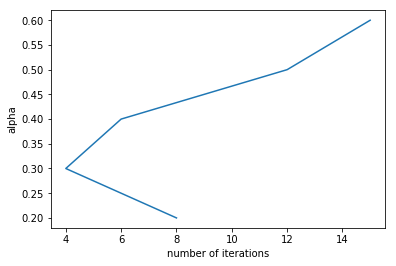

In [30]:
# Problem 4

from matplotlib import pyplot as plt
def prob4(f, x0, f1, alpha, tol = 1e-5, max_iter = 15):
    i = 0
    dist = 1
    while i < max_iter and dist > tol:
        x1 = x0
        x0 = x0 - alpha * f(x0)/f1(x0)
        dist = abs(x1 - x0)
        i += 1
    return x0, i

alpha = np.linspace(0.2, 0.6, 5)
i = np.zeros(5)
for j in range(5):
    i[j] = prob4(f, 0.01, f1, alpha[j])[1]
plt.plot(i, alpha)
plt.xlabel('number of iterations')
plt.ylabel('alpha')
plt.show()

In [40]:
# Problem 5
import scipy.linalg as la
def high_dimension_newton(f, x0, alpha = 1, tol = 1e-5, max_iter = 15):
    i = 0
    dist = 1
    f1 = jacobian(f)
    while i < max_iter and dist > tol:
        x1 = x0
        x0 = x0 - alpha * np.dot(la.inv(f1(x0)), f(x0))
        dist = la.norm(x1 - x0)
        i += 1
    return x0

f = lambda x: anp.exp(x) - 2
print(high_dimension_newton(f, np.array([0.5])))

[ 0.69314718]


The function still works for one-dimensional problem. Multi-dimensional ones will be tested later.

In [88]:
# Problem 6
gamma, delta = 5, 1
f = lambda x: anp.array([gamma * x[0] * x[1] -x[0] * (1 + x[1]), 
                        -x[0] * x[1] + (delta - x[1]) * (1 + x[1])])
print(high_dimension_newton(f, anp.array([-0.25, 0.20])))
print(high_dimension_newton(f, anp.array([-0.25, 0.20]), alpha = 0.55))

[ -1.49207286e-14  -1.00000000e+00]
[ 3.75081227  0.24993985]


In [161]:
# Problem 7
def prob7(f, f1, roots, bounds, res, iters = 200):
    x_real = np.linspace(bounds[0], bounds[1], res)
    x_imag = np.linspace(bounds[2], bounds[3], res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    Y = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            x0 = X_0[i, j]
            for k in range(iters): 
                x1 = x0 - f(x0)/f1(x0)
                if abs(x1 - x0) < 1e-6: 
                    break
                x0 = x1
            Y[i, j] = np.argmin(np.abs(roots - x0))
    plt.pcolormesh(x_real, x_imag, Y, cmap = 'brg')
    plt.show()

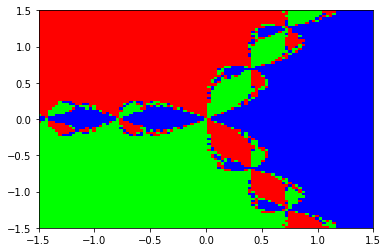

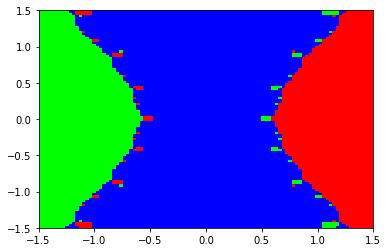

In [165]:
roots1 = np.array([1, -1/2 + (np.sqrt(3)/2)*1j, -1/2 - (np.sqrt(3)/2)*1j])
roots2 = np.array([0, 1, -1])
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
g = lambda x: x**3 - x
Dg = lambda x: 3*x**2 - 1
prob7(f, Df, roots1, [-1.5, 1.5, -1.5, 1.5], 100)
prob7(g, Dg, roots2, [-1.5, 1.5, -1.5, 1.5], 100)